In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UpdatedResumeDataset.csv')

In [3]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [5]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [7]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

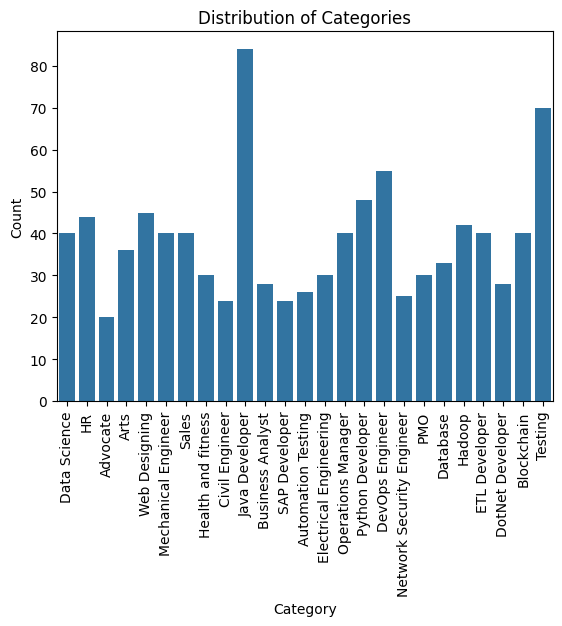

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.countplot(x='Category', data=df)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10, 6))

cleaning the data


In [30]:
import re
def cleanResume(text):
    
    cleaned_text = re.sub(r'\b[\w.%+-]+@gmail\.com\b', '', text)
    cleaned_text = re.sub(r'\d+', '', cleaned_text)  # Remove numbers
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)  # Remove extra spaces
    cleaned_text = re.sub(r'@\s+\s', '', cleaned_text)  # Remove email addresses
    cleaned_text = re.sub(r'http\S+|www\S+|https\S+', '', cleaned_text)  # Remove URLs
    cleaned_text = re.sub(r'\W+', ' ', cleaned_text)  # Remove special characters
    cleaned_text = re.sub(r'RT|cc',' ',cleaned_text)
    cleaned_text = cleaned_text.lower()  # Convert to lowercase
    return cleaned_text.strip()

In [32]:
cleanResume("###This is a saheb@gmail.com sample  https:\ resume text with numbers 123,")

'this is a sample resume text with numbers'

In [35]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))

In [36]:
df['Resume'][0]

'skills programming languages python pandas numpy scipy scikit learn matplotlib sql java javascript jquery machine learning regression svm naã ve bayes knn random forest decision trees boosting techniques cluster analysis word embedding sentiment analysis natural language processing dimensionality reduction topic modelling lda nmf pca neural nets database visualizations mysql sqlserver cassandra hbase elasticsearch d js dc js plotly kibana matplotlib ggplot tableau others regular expression html css angular logstash kafka python flask git docker computer vision open cv and understanding of deep learning education details data science assurance associate data science assurance associate ernst young llp skill details javascript exprience months jquery exprience months python exprience monthscompany details company ernst young llp description fraud investigations and dispute services assurance technology assisted review tar technology assisted review assists in a elerating the review proc

In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [41]:
df

,Category,Resume
0,6,skills programming languages python pandas num...
1,6,education details may to may b e uit rgpv data...
2,6,areas of interest deep learning control system...
3,6,skills â r â python â sap hana â tableau â sap...
4,6,education details mca ymcaust faridabad haryan...
...,...,...
957,23,computer skills â proficient in ms office word...
958,23,â willingness to a ept the challenges â positi...
959,23,personal skills â quick learner â eagerness to...
960,23,computer skills software knowledge ms power po...


Vectorization


In [43]:
from sklearn .feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Resume'])

In [48]:
from sklearn.model_selection import train_test_split
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 7273), (193, 7273), (769,), (193,))

In [53]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [55]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 97.41%
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       0.75      1.00      0.86         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      0.60      0.75         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      0.83      0.91        12
                   Ha

In [56]:
# save the model and vectorizer
import pickle
pickle.dump(model, open('knn_model.pkl', 'wb'))
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))
pickle.dump(le, open('label_encoder.pkl', 'wb'))

In [62]:
import pickle
# Load the model and vectorizer
model = pickle.load(open('knn_model.pkl', 'rb'))

# clean the new resume text
new_resume = "Experienced software engineer with a strong background in Python and machine learning. Proficient in data analysis and algorithm development."
cleaned_resume = cleanResume(new_resume)

# Transform the cleaned resume text
input_features = vectorizer.transform([cleaned_resume])

# make the prediction using the loaded model
predicted_id = model.predict(input_features)[0]

# map the category id back to the original category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Developer",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operation Manager",
    6: "Data Scientist",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts Graduate",
    7: "Database",
    11: "Electrical Engineer",
    14: "Health and Finance",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(predicted_id, "Unknown Category")
print(f"The predicted category for the new resume is: {category_name}")

The predicted category for the new resume is: Data Scientist
